<a href="https://colab.research.google.com/github/BiancaHill/Data-Science/blob/main/BianHillU6Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 6 Project: Making a Generalized Linear Model (multiple predictors)

I selected rocks in general as my data set because rocks sounded cool and there was a bunch of complicated words and concepts that I had to look up that intrigued me, as I didn't know rocks were that complicated. I started off my project with the assumption that bulk density would be the variable that affects the permeability that most. I also started by predicting porosity with permeability, but quickly changed to predict permeability as the interaction goes the other way.



In [1]:
!pip install bambi
import bambi as bmb
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt
import pymc as pm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 6.2 MB/s eta 0:00:00


I made the sample column a category to perform a categorical model, as each sample number was a different type of rock which acts as a species in data sets having to do with animals.

In [2]:
rock = pd.read_csv('https://raw.githubusercontent.com/BiancaHill/Data-Science/refs/heads/main/Rocks.csv')
url_rock = 'https://raw.githubusercontent.com/BiancaHill/Data-Science/refs/heads/main/Rocks.csv'
rock = pd.read_csv(url_rock,dtype={'Sample':'category'})
rock

,Sample,BulkDensity,Porosity,LogPermeability,InsoluableResidue,TotalCarbonate,GrainlengthA,SDA,GrainlengthB,SDB,Calcite,Dolomite,Unnamed: 12
0,1,2.6975,0.83,-1.2218,4.43,95.57,11.88,1.563,12.19,1.379,74.44,21.08,NaN
1,1,2.6415,0.59,-1.6989,7.19,92.81,10.31,1.410,10.85,1.361,85.80,7.00,NaN
2,1,2.6457,0.67,-1.6989,2.17,97.83,12.51,1.690,12.92,1.759,93.71,4.13,NaN
3,1,2.6342,0.50,-1.6989,6.34,93.66,10.76,1.327,11.40,1.361,95.55,2.17,NaN
4,1,2.6236,1.10,-1.2218,2.24,97.76,8.62,1.560,8.92,1.427,77.38,20.41,NaN
5,2,2.7278,1.10,-1.6989,8.85,91.16,9.85,0.848,10.25,0.815,1.22,89.93,NaN
6,2,2.7480,2.80,-1.2218,7.72,92.28,9.60,1.045,9.85,1.052,2.02,90.26,NaN
7,2,2.6678,4.60,-1.7213,8.18,91.82,8.75,0.999,9.10,0.879,1.56,75.38,NaN
8,2,2.6949,3.50,-1.5228,5.41,94.59,9.93,0.910,10.24,0.848,1.27,93.28,NaN
9,2,2.7020,8.60,-1.3010,19.25,80.75,10.00,0.850,10.54,0.774,1.43,79.32,NaN


This model is just all the variables together in a model without any interactions, just to see what they would do, to figure out where to go from there.

In [3]:
#model with no interactions
model_rock = bmb.Model("LogPermeability ~ BulkDensity + Porosity + InsoluableResidue + TotalCarbonate + GrainlengthA + SDA + GrainlengthB + SDB  + Calcite + Dolomite", data=rock)
idata_rock = model_rock.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

ERROR:pymc.stats.convergence:There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


In [23]:
model_rock

       Formula: LogPermeability ~ BulkDensity + Porosity + InsoluableResidue + TotalCarbonate + GrainlengthA + SDA + GrainlengthB + SDB  + Calcite + Dolomite
        Family: gaussian
          Link: mu = identity
  Observations: 31
        Priors: 
    target = mu
        Common-level effects
            Intercept ~ Normal(mu: -1.6551, sigma: 31.5058)
            BulkDensity ~ Normal(mu: 0.0, sigma: 10.5008)
            Porosity ~ Normal(mu: 0.0, sigma: 0.352)
            InsoluableResidue ~ Normal(mu: 0.0, sigma: 0.0903)
            TotalCarbonate ~ Normal(mu: 0.0, sigma: 0.0903)
            GrainlengthA ~ Normal(mu: 0.0, sigma: 0.6657)
            SDA ~ Normal(mu: 0.0, sigma: 2.1267)
            GrainlengthB ~ Normal(mu: 0.0, sigma: 0.6674)
            SDB ~ Normal(mu: 0.0, sigma: 2.2476)
            Calcite ~ Normal(mu: 0.0, sigma: 0.0154)
            Dolomite ~ Normal(mu: 0.0, sigma: 0.0169)
        
        Auxiliary parameters
            sigma ~ HalfStudentT(nu: 4.0, sigma: 0.24

Bambi started off with using normal distributions, which I agree with. They're rocks, they should follow a pretty standard trend. There might be a few outliers, but generally all samples of the same rocks should be pretty similar.

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


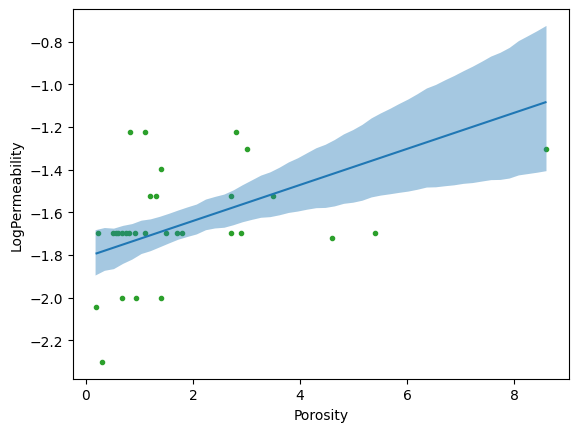

In [60]:
bmb.interpret.plot_predictions(model_rock, idata_rock, "Porosity")
plt.plot(rock.Porosity, rock.LogPermeability, "C2.", zorder=-3)

The scatter plot looks ok, the trend line goes through about the middle of the data, but it doesn't currently have any interactions so hopefully it'll get better from here.

Adding interactions between all the variables and using elpd_loo to find the best one

In [5]:
#interaction between bulk density & Porosity
model_BP = bmb.Model("LogPermeability ~ BulkDensity + Porosity + BulkDensity:Porosity", data=rock)
idata_BP = model_BP.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

ERROR:pymc.stats.convergence:There were 1 divergences after tuning. Increase `target_accept` or reparameterize.


In [6]:
#interaction between Insoluable Residue & Porosity
model_IP = bmb.Model("LogPermeability ~ InsoluableResidue + Porosity + InsoluableResidue:Porosity", data=rock)
idata_IP = model_IP.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

In [7]:
#interaction between total carbonate & Porosity
model_TP = bmb.Model("LogPermeability ~ TotalCarbonate + Porosity + TotalCarbonate:Porosity", data=rock)
idata_TP = model_TP.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


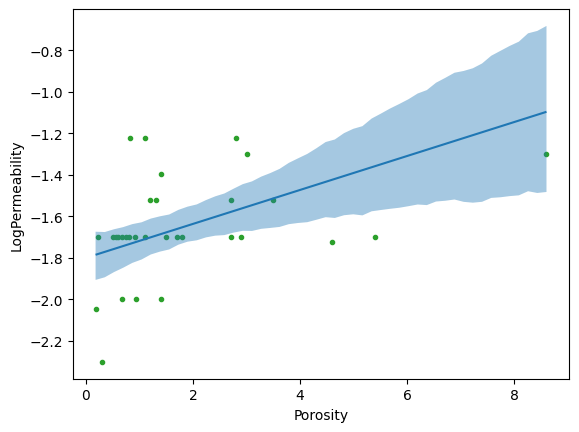

In [61]:
bmb.interpret.plot_predictions(model_TP, idata_TP, "Porosity")
plt.plot(rock.Porosity, rock.LogPermeability, "C2.", zorder=-3)

I'm not sure if this one is any better, as the line is still pretty similar, but the margin of possibility spreads over more data points. The small data set may be the explanation for the similarity.

In [49]:
model_TPcate = bmb.Model("LogPermeability ~ Porosity + TotalCarbonate|Porosity", data=rock)
#create the model
idata_TPcate = model_TPcate.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


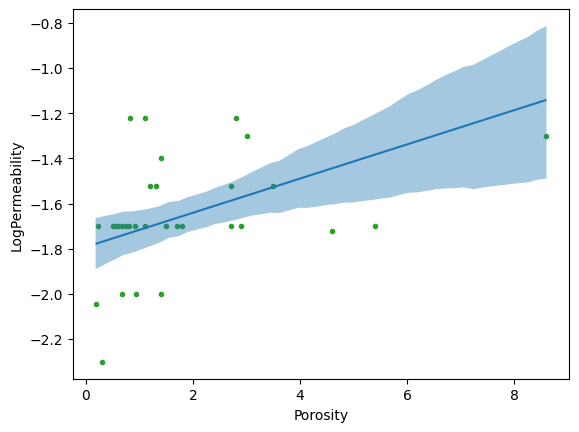

In [62]:
bmb.interpret.plot_predictions(model_TPcate, idata_TPcate, "Porosity")
plt.plot(rock.Porosity, rock.LogPermeability, "C2.", zorder=-3)

Based off of my understanding of the connections between variables from my causal diagram, I thought that the hierarchical model between

In [8]:
#interaction between grain length A & Porosity
model_GAP = bmb.Model("LogPermeability ~ GrainlengthA + Porosity + GrainlengthA:Porosity", data=rock)
idata_GAP = model_GAP.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

ERROR:pymc.stats.convergence:There were 8 divergences after tuning. Increase `target_accept` or reparameterize.


In [9]:
#interaction between SDA & Porosity
model_SDAP = bmb.Model("LogPermeability ~ SDA + Porosity + SDA:Porosity", data=rock)
idata_SDAP = model_SDAP.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

ERROR:pymc.stats.convergence:There were 9 divergences after tuning. Increase `target_accept` or reparameterize.


In [10]:
#interaction between grain length B & Porosity
model_GBP = bmb.Model("LogPermeability ~ GrainlengthB + Porosity + GrainlengthB:Porosity", data=rock)
idata_GBP = model_GBP.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

In [11]:
#interaction between SDB & Porosity
model_SDBP = bmb.Model("LogPermeability ~ SDB + Porosity + SDB:Porosity", data=rock)
idata_SDBP = model_SDBP.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

In [12]:
#interaction between calcite & Porosity
model_CP = bmb.Model("LogPermeability ~ Calcite + Porosity + Calcite:Porosity", data=rock)
idata_CP = model_CP.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

In [13]:
#interaction between dolomite & Porosity
model_DP = bmb.Model("LogPermeability ~ Dolomite + Porosity + Dolomite:Porosity", data=rock)
idata_DP = model_DP.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

In [14]:
#Porosity predicting log permeability with everything else interacting with porosity
model_inter = bmb.Model("LogPermeability ~ BulkDensity + Porosity + InsoluableResidue + TotalCarbonate + GrainlengthA + SDA + GrainlengthB + SDB  + Calcite + Dolomite + BulkDensity:Porosity + Porosity:InsoluableResidue + Porosity:TotalCarbonate + Porosity:GrainlengthA + Porosity:SDA + Porosity:GrainlengthB + Porosity:SDB  + Porosity:Calcite + Porosity:Dolomite", data=rock)
idata_inter = model_inter.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

ERROR:pymc.stats.convergence:There were 18 divergences after tuning. Increase `target_accept` or reparameterize.


<Axes: xlabel='LogPermeability'>

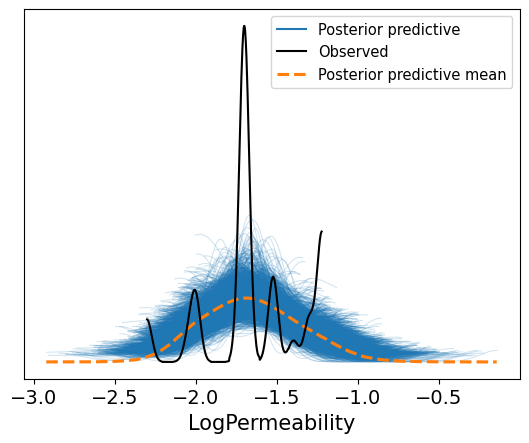

In [17]:
model_inter.predict(idata_inter, kind="response")
az.plot_ppc(idata_inter)

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


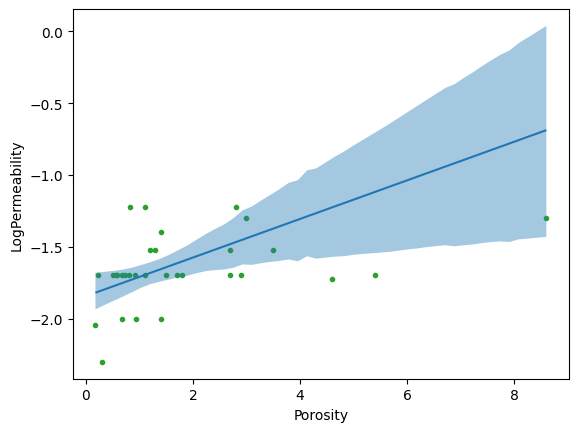

In [55]:
bmb.interpret.plot_predictions(model_inter, idata_inter, "Porosity")
plt.plot(rock.Porosity, rock.LogPermeability, "C2.", zorder=-3)

This model has the slope of the posterior predictive check a bit higher than the last one, with the accuracy of the model the slightest bit better but still not amazing.

Based off of my causal diagram, LogPermeability is most directly affected by Porosity, which is affected by literally all the other variables. So, I did a model of interactions between porosity and all the other variables, predicting log permeability.

In [68]:
model_hierchy = bmb.Model("LogPermeability ~ BulkDensity + Porosity + InsoluableResidue + TotalCarbonate + GrainlengthA + SDA + GrainlengthB + SDB  + Calcite + Dolomite|Sample", data=rock)
#create the model
idata_hierchy = model_hierchy.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

ERROR:pymc.stats.convergence:There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


<Axes: xlabel='LogPermeability'>

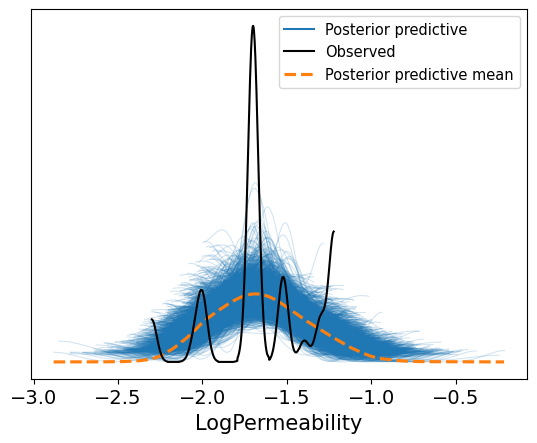

In [75]:
model_hierchy.predict(idata_hierchy, kind="response")
az.plot_ppc(idata_hierchy)

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


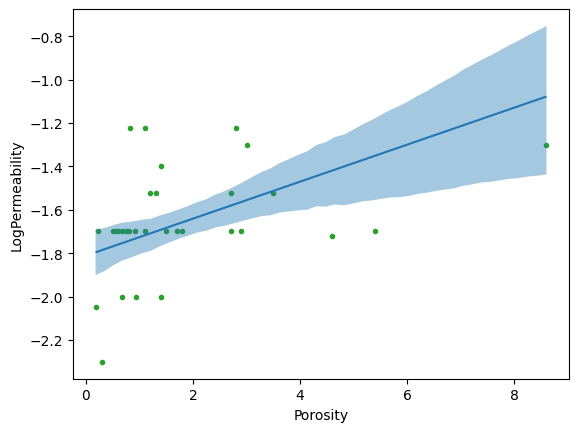

In [70]:
bmb.interpret.plot_predictions(model_hierchy, idata_hierchy, "Porosity")
plt.plot(rock.Porosity, rock.LogPermeability, "C2.", zorder=-3)

Looking back on the posterior predictive check of making all the variables have an interaction with porosity, the hierarchical model actually looked a little bit better. Just the interactions it has a wider region of error and but the posterior predictives look about the same. We can also see the sheer number of modes in the data based on the number of bump crests. This is probably because of how little data there is in the data set (only about 30 data points)Unfortunetly, the data set being incomplete means that I can't get a super accurate model, this is about as good as it's gonna get. This model is pretty good, it's not amazing, but taking into account the small data set it only seems to fail to take into account the more unusual samples, specifically the middle grounds and not the super low values or the super high variables.

In [79]:
rock_check = az.compare( {"model_BP":idata_BP,
                          "model_IP":idata_IP,
                          "model_TP":idata_TP,
                          "model_GAP":idata_GAP,
                          "model_SDAP":idata_SDAP,
                          "model_GBP":idata_GBP,
                          "model_SDBP":idata_SDBP,
                          "model_CP":idata_CP,
                          "model_DP":idata_DP,
                          "model_rock":idata_rock,
                          "model_inter":idata_inter,
                          "model_hierchy":idata_hierchy,
                          "model_TPcate":idata_TPcate} )
rock_check

/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimat

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
model_hierchy,0,1.758783,8.906910,0.000000,6.876790e-01,4.711803,0.000000,True,log
model_rock,1,1.096414,9.392284,0.662370,5.846822e-15,4.790102,0.344605,True,log
model_TPcate,2,-0.185401,3.456380,1.944184,6.659395e-15,3.826332,2.794387,True,log
model_CP,3,-0.390521,5.030148,2.149304,2.275576e-01,4.624018,3.594217,True,log
model_inter,4,-0.883008,12.497069,2.641791,2.213566e-15,4.921946,1.856946,True,log
model_TP,5,-0.885083,4.166959,2.643866,4.868739e-15,3.961247,2.723783,False,log
model_GBP,6,-1.123417,4.580517,2.882201,0.000000e+00,4.733115,2.003645,False,log
model_SDBP,7,-1.172099,3.816820,2.930883,1.196948e-14,3.256605,3.424740,False,log
model_SDAP,8,-1.362151,4.202896,3.120934,8.476340e-02,3.480166,3.605925,True,log
model_DP,9,-1.379469,4.359349,3.138253,6.723249e-15,4.648610,3.518579,True,log


<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

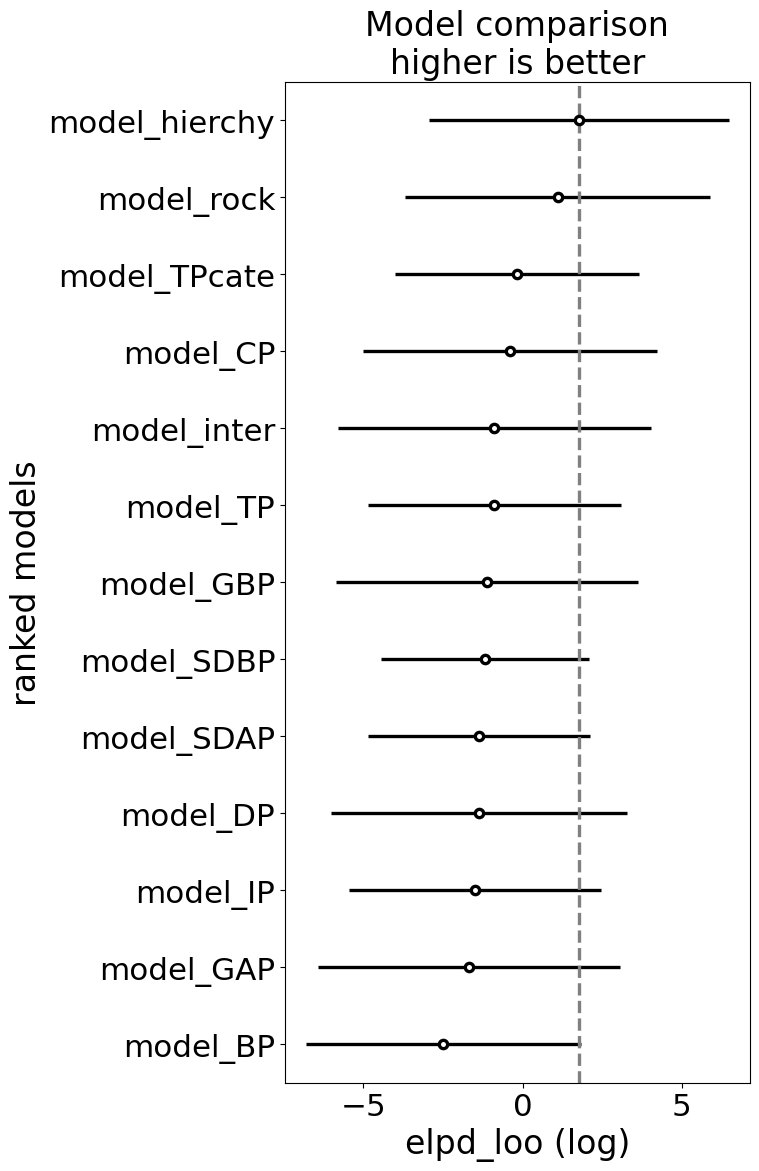

In [80]:
az.plot_compare(rock_check)

Looking at the models that has an elpd_loo that the model trusts, they're all around the same point, with the ones it doesn't trust being much more skewed from that point, like model_categor and model_TPhier. Because it's such a small data set, it doesnt trust 3/5 of the models and looking at the posterior mean and posterior predictive plots, they look pretty similar to each other.

So, final conclusion, the most influencial variable that it trusts in Total Carbonate interacting with Porosity, which is what I thought originally. However, I would need a bigger data set to give a confident answer.